# Downloading data from GEO


## Reading list

- [What the FPKM](https://haroldpimentel.wordpress.com/2014/05/08/what-the-fpkm-a-review-rna-seq-expression-units/) - Explain difference between TPM/FPKM/RPKM units
- [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) - linear correlation unit

## Intro

The Gene Expression Omnibus (GEO) is a website funded by the NIH to store the expression data associated with papers. Many papers require you to submit your data to GEO to be able to publish.

Search [GEO](http://www.ncbi.nlm.nih.gov/geo) for the accession ID from [Shalek + Satija 2013](http://www.ncbi.nlm.nih.gov/pubmed/23685454). **Download the "Series Matrix" to your laptop** and **copy the link for the `GSE41265_allGenesTPM.txt.gz`" file**. All the "Series" file formats contain the same information in different formats. The Matrix one is the easiest to understand.

Open the "Series Matrix" in Excel (or equivalent) on your laptop. And look at the format and what's described.

In [8]:
! wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41265/suppl/GSE41265_allGenesTPM.txt.gz

--2016-02-12 19:50:35--  ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41265/suppl/GSE41265_allGenesTPM.txt.gz
           => "GSE41265_allGenesTPM.txt.gz"
Resolving ftp.ncbi.nlm.nih.gov... 130.14.250.7, 2607:f220:41e:250::11
Connecting to ftp.ncbi.nlm.nih.gov|130.14.250.7|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/series/GSE41nnn/GSE41265/suppl ... done.
==> SIZE GSE41265_allGenesTPM.txt.gz ... 1099290
==> PASV ... done.    ==> RETR GSE41265_allGenesTPM.txt.gz ... done.
Length: 1099290 (1.0M) (unauthoritative)

100%[======================================>] 1,099,290   1.23M/s   in 0.9s    

2016-02-12 19:50:37 (1.23 MB/s) - "GSE41265_allGenesTPM.txt.gz" saved [1099290]



We'll be using three additional libraries in Python:

1. [`numpy`](http://www.numpy.org/) - (pronounced "num-pie") which is basis for most scientific packages. It's basically a nice-looking Python interface to C code. It's very fast.
2. [`pandas`](http://pandas.pydata.org) - This is the "DataFrames in Python." (like R's nice dataframes) They're a super convenient form that's based on `numpy` so they're fast. And you can do convenient things like calculate mea n and variance very easily.
3. [`matplotlib`](http://matplotlib.org/) - This is the base plotting library in Python.
4. [`scipy`](http://www.scipy.org/) - (pronounced "sigh-pie") Contains 
4. [`seaborn`](http://web.stanford.edu/~mwaskom/software/seaborn/index.html) - Statistical plotting library. To be completely honest, R's plotting and graphics capabilities are much better than Python's. However, Python is a really nice langauge to learn and use, it's very memory efficient, can be parallized well, and has a very robust machine learning library, `scikit-learn`, which has a very nice and consistent interface. So this is Python's answer to `ggplot2` (very popular R library for plotting) to try and make plotting in Python nicer looking and to make statistical plots easier to do.

In [9]:
# We're doing "import superlongname as abbrev" for our laziness - this way we don't have to type out the whole thing each time.

# Numerical python library (pronounced "num-pie")
import numpy as np

# Dataframes in Python
import pandas as pd

# Python plotting library
import matplotlib.pyplot as plt

# T-test of independent samples
from scipy.stats import ttest_ind

# Statistical plotting library we'll use
import seaborn as sns

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline

# Read the data table
geo_expression = pd.read_table('GSE41265_allGenesTPM.txt.gz', 
                               
                               # Sets the first (Python starts counting from 0 not 1) column as the row names
                               index_col=0, 
                               
                               # Tells pandas to decompress the gzipped file
                               compression='gzip')

/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Let's look at the top of the dataframe by using `head()`. By default, this shows the first 5 rows.

In [10]:
geo_expression.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,...,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,...,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,...,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605


To specify a certain number of rows, put a number between the parentheses.

In [11]:
geo_expression.head(8)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,...,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,...,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,...,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605
T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PDE10A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018610,0.011152
1700010I14RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806956,0.000000,0.000000


### Exercise 1: using `.head()`

Show the first 17 rows of `geo_expression`

In [12]:
# YOUR CODE HERE
geo_expression.head(17)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,...,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,...,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,...,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605
T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PDE10A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018610,0.011152
1700010I14RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806956,0.000000,0.000000
6530411M01RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
assert _.index.tolist() == ['XKR4', 'AB338584', 'B3GAT2', 'NPL', 'T2', 'T', 'PDE10A', '1700010I14RIK', 
                            '6530411M01RIK', 'PABPC6', 'AK019626', 'AK020722', 'QK', 'B930003M22RIK',
                            'RGS8', 'PACRG', 'AK038428']

Let's get a sense of this data by plotting the distributions using `boxplot` from seaborn. To save the output, we'll need to get access to the current figure, and save this to a variable using `plt.gcf()`. And then we'll save this figure with `fig.savefig("filename.pdf")`. You can use other extensions (e.g. "`.png`", "`.tiff`" and it'll automatically save as that forma)

/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


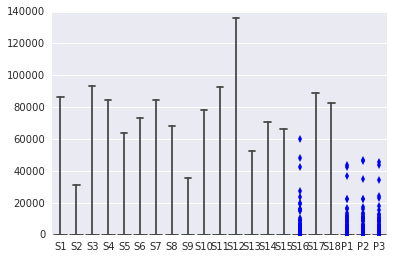

In [14]:
sns.boxplot(geo_expression)

# gcf = Get current figure
fig = plt.gcf()
fig.savefig('geo_expression_boxplot.pdf')

Oh right we have expression data and the scales are enormous... notice the 140,000 maximum. Let's add 1 to all values and take the log2 of the data. We add one because log(0) is undefined and then all our logged values start from zero too. This "$\log_2(TPM + 1)$" is a very common transformation of expression data so it's easier to analyze.

In [15]:
expression_logged = np.log2(geo_expression+1)
expression_logged.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.033427,0.000000,0.000000,0.041774,0.000000,0.077861,0.000000,0.041871,...,0.000000,0.000000,0.044960,0.000000,0.000000,0.000000,5.431296,0.748742,0.032801,0.150866
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,...,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,3.019587,2.949914,3.956563
T2,0.149583,0.228984,0.000000,0.000000,0.242088,0.105695,0.109290,0.000000,0.129215,0.106459,...,0.759973,0.014551,0.113616,0.000000,0.000000,0.120192,0.095146,0.086869,0.000000,0.071221


/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


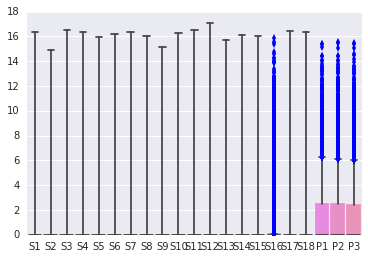

In [16]:
sns.boxplot(expression_logged)

# gcf = Get current figure
fig = plt.gcf()
fig.savefig('expression_logged_boxplot.pdf')

### Exercise 2: Interpreting distributions
Now that these are on moreso on the same scale ...

Q: What do you notice about the pooled samples (P1, P2, P3) that is different from the single cells?

In [ ]:
# YOUR CODE HERE

## Filtering expression data

Seems like a lot of genes are near zero, which means we need to filter our genes.

We can ask which genes have log2 expression values are less than 10 (weird example I know - stay with me). This creates a dataframe of `boolean` values of True/False.

In [17]:
expression_logged < 10

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
AB338584,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
B3GAT2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
NPL,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
T2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
T,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
PDE10A,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1700010I14RIK,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6530411M01RIK,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


What's nice about booleans is that False is 0 and True is 1, so we can sum to get the number of "Trues." This is a simple, clever way that we can filter on a count for the data. We **could** use this boolean dataframe to filter our original dataframe, but then we lose information. For all values that are less than 10, it puts in a "not a number" - "NaN."

In [18]:
expression_at_most_10 = expression_logged[expression_logged < 10]
expression_at_most_10

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.033427,0.000000,0.000000,0.041774,0.000000,0.077861,0.000000,0.041871,...,0.000000,0.000000,0.044960,0.000000,0.000000,0.000000,5.431296,0.748742,0.032801,0.150866
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,...,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,3.019587,2.949914,3.956563
T2,0.149583,0.228984,0.000000,0.000000,0.242088,0.105695,0.109290,0.000000,0.129215,0.106459,...,0.759973,0.014551,0.113616,0.000000,0.000000,0.120192,0.095146,0.086869,0.000000,0.071221
T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PDE10A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026602,0.016000
1700010I14RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.853562,0.000000,0.000000
6530411M01RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Exercise 3: Crude filtering on expression data

Create a dataframe called "`expression_greater_than_5`" which contains only values that are greater than 5 from `expression_logged`.

In [19]:
# YOUR CODE HERE
expression_greater_than_5 = expression_logged[expression_logged>5]

In [20]:
# This `assert` tests for the total number of "NaN"s (nulls) in the dataframe by getting a boolean matrix from
# `isnull()` and then summing twice to get the total
assert expression_greater_than_5.isnull().sum().sum() == 539146


The crude filtering above is okay, but we're smarter than that. We want to use the filtering in the paper: 

> *... discarded genes that were not appreciably expressed (transcripts per million (TPM) > 1) in at least three individual cells, retaining 6,313 genes for further analysis.*

We want to do THAT, but first we need a couple more concepts. The first one is summing booleans.

## A smarter way to filter

Remember that booleans are really 0s (`False`) and 1s (`True`)? This turns out to be VERY convenient and we can use this concept in clever ways.

We can use `.sum()` on a boolean matrix to get the number of genes with expression greater than 10 for each sample:

In [21]:
(expression_logged > 10).sum()

S1     136
S2     174
S3     142
S4     135
S5     134
S6     144
S7     145
S8     124
S9     171
S10    135
S11    132
S12    129
S13    133
S14    139
S15    157
S16    147
S17    119
S18    152
P1     136
P2     136
P3     140
dtype: int64

`pandas` is column-oriented and by default, it will give you a sum for each column. But **we** want a sum for each row. How do we do that?


We can sum the boolean matrix we created with "`expression_logged < 10`" along `axis=1` (along the samples) to get **for each gene, how many samples have expression less than 10**. In `pandas`, this column is called a "`Series`" because it has only one dimension - its length. Internally, `pandas` stores dataframes as a bunch of columns - specifically these `Series`ssssss.

This turns out to be not that many.

In [22]:
(expression_logged > 10).sum(axis=1)

GENE
XKR4             0
AB338584         0
B3GAT2           0
NPL              0
T2               0
T                0
PDE10A           0
1700010I14RIK    0
6530411M01RIK    0
PABPC6           0
AK019626         0
AK020722         0
QK               0
B930003M22RIK    0
RGS8             0
PACRG            0
AK038428         0
AK163153         0
PARK2            0
AK080902         0
AGPAT4           0
MAP3K4           0
AK029100         0
PLG              0
SLC22A3          0
RGS16            0
AK021075         0
SLC22A2          0
SLC22A1          0
IGF2R            0
                ..
AK207024         0
SYTL3            0
E330020D12RIK    0
DYNLT1B          0
TMEM181B         0
DYNLT1C          0
AK178082         0
TMEM181C-PS      0
EZR              0
AK037830         0
MIR692-1         0
AK007238         0
RSPH3B           0
TAGAP1           0
1700012A16RIK    0
RNASET2A         0
GM1604B          0
RPS6KA2          0
TCP10B           0
GM9992           0
AK085062         0
DHX9   

Now we can apply ANOTHER filter and find genes that are "present" (expression greater than 10) in at least 5 samples. We'll save this as the variable `genes_of_interest`. Notice that this doesn't the `genes_of_interest` but rather the list at the bottom. This is because what you see under a code cell is the output of the last thing you called. The "hash mark"/"number sign" "`#`" is called a **comment character** and makes the rest of the line after it not read by the Python language.

### Exercise 4: Commenting and uncommenting

To see `genes_of_interest`, "uncomment" the line by removing the hash sign, and commenting out the list `[1, 2, 3]`.

In [28]:
genes_of_interest = (expression_logged > 10).sum(axis=1) >= 5
# genes_of_interest
#[1, 2, 3]
genes_of_interest

GENE
XKR4             False
AB338584         False
B3GAT2           False
NPL              False
T2               False
T                False
PDE10A           False
1700010I14RIK    False
6530411M01RIK    False
PABPC6           False
AK019626         False
AK020722         False
QK               False
B930003M22RIK    False
RGS8             False
PACRG            False
AK038428         False
AK163153         False
PARK2            False
AK080902         False
AGPAT4           False
MAP3K4           False
AK029100         False
PLG              False
SLC22A3          False
RGS16            False
AK021075         False
SLC22A2          False
SLC22A1          False
IGF2R            False
                 ...  
AK207024         False
SYTL3            False
E330020D12RIK    False
DYNLT1B          False
TMEM181B         False
DYNLT1C          False
AK178082         False
TMEM181C-PS      False
EZR              False
AK037830         False
MIR692-1         False
AK007238         False
RSPH3B

In [29]:
assert isinstance(_, pd.Series)

## Getting only rows that you want (aka subsetting)

Now we have some genes that we want to use - how do you pick just those? This can also be called "subsetting" and in `pandas` has the technical name [indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

In `pandas`, to get the rows (genes) you want using their name (gene symbol) or boolean matrix, you use `.loc[rows_you_want]`. Check it out below.

In [37]:
expression_filtered = expression_logged.loc[genes_of_interest]
print(expression_filtered.shape)  # shows (nrows, ncols) - like in manhattan you do the Street then the Avenue
expression_filtered.head()

(197, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
ATP6V0C,9.745346,10.338442,9.705273,9.851411,11.210533,11.314901,10.506642,10.508520,10.975713,10.603084,...,3.714740,9.035086,9.905386,11.289761,9.590110,11.709422,10.520829,10.723323,10.598279,10.698255
ATP6V0E,9.759254,10.803245,10.525163,10.785315,10.075346,10.638548,10.359707,10.014628,9.771179,10.574154,...,10.959248,10.990677,11.049803,10.703815,10.301053,9.191934,10.591682,10.037123,10.148096,10.028377
ATPASE6,12.719591,12.347896,13.192752,12.893249,12.819598,13.085962,13.277271,13.113396,12.628063,12.661354,...,13.222727,13.251932,13.156902,12.800159,13.209035,12.882030,13.395213,12.503962,12.461228,12.450822
RPS18,10.080293,10.954047,10.065784,8.589813,9.639211,10.413408,10.894525,9.841402,11.569947,10.433555,...,11.444838,11.041503,9.424527,9.254507,11.392399,10.085782,10.075320,10.290437,10.274727,10.370112
H2-K1,7.995149,7.052728,7.107182,8.214478,7.097269,9.097707,9.356559,8.312146,2.383879,7.684320,...,11.932448,10.292641,8.874284,7.708732,9.783448,6.708027,6.825463,10.152567,10.192475,10.200949


In [38]:
expression_filtered = expression_logged[genes_of_interest]
print(expression_filtered.shape)  # shows (nrows, ncols) - like in manhattan you do the Street then the Avenue
expression_filtered.head()
#but it's the same without loc??

(197, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
ATP6V0C,9.745346,10.338442,9.705273,9.851411,11.210533,11.314901,10.506642,10.508520,10.975713,10.603084,...,3.714740,9.035086,9.905386,11.289761,9.590110,11.709422,10.520829,10.723323,10.598279,10.698255
ATP6V0E,9.759254,10.803245,10.525163,10.785315,10.075346,10.638548,10.359707,10.014628,9.771179,10.574154,...,10.959248,10.990677,11.049803,10.703815,10.301053,9.191934,10.591682,10.037123,10.148096,10.028377
ATPASE6,12.719591,12.347896,13.192752,12.893249,12.819598,13.085962,13.277271,13.113396,12.628063,12.661354,...,13.222727,13.251932,13.156902,12.800159,13.209035,12.882030,13.395213,12.503962,12.461228,12.450822
RPS18,10.080293,10.954047,10.065784,8.589813,9.639211,10.413408,10.894525,9.841402,11.569947,10.433555,...,11.444838,11.041503,9.424527,9.254507,11.392399,10.085782,10.075320,10.290437,10.274727,10.370112
H2-K1,7.995149,7.052728,7.107182,8.214478,7.097269,9.097707,9.356559,8.312146,2.383879,7.684320,...,11.932448,10.292641,8.874284,7.708732,9.783448,6.708027,6.825463,10.152567,10.192475,10.200949


Wow, our matrix is very small - 197 genes! We probably don't want to filter THAT much... I'd say a range of 5,000-15,000 genes after filtering is a good ballpark. Not too big so it's impossible to work with but not too small that you can't do any statistics.

We'll get closer to the expression data created by the paper. Remember that they filtered on genes that had expression greater than 1 in at least 3 *single cells*. We'll filter for expression greater than 1 in at least 3 *samples* for now - we'll get to the single stuff in a bit. For now, we'll filter on all samples.

### Exercise 5: Filtering on the presence of genes

Create a dataframe called `expression_filtered_by_all_samples` that consists only of genes that have expression greater than 1 in at least 3 samples.

#### Hint for `IndexingError: Unalignable boolean Series key provided`

If you're getting this error, double-check your `.sum()` command. Did you remember to specify that you want to get the "number present" for each **gene** (row)? Remember that `.sum()` by default gives you the sum over columns. How do you get the sum over rows?

In [31]:
expression_filtered_by_all_samples = expression_logged.loc[(expression_logged>1).sum(axis=1) > 2]

# YOUR CODE HERE
print(expression_filtered_by_all_samples.shape)
expression_filtered_by_all_samples.head()

(9943, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,...,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,3.019587,2.949914,3.956563
QK,7.268986,6.035328,5.551280,0.096368,4.769427,0.164792,5.381642,3.967559,0.193883,1.096957,...,0.000000,4.899227,3.310201,0.434425,5.118232,3.153489,0.059040,5.581934,5.324961,5.297343
AK163153,1.802450,2.809825,1.561663,1.615288,1.828564,1.301057,1.490883,1.411808,1.761127,1.493531,...,3.509926,3.034182,1.602128,1.734510,6.415105,1.972540,0.617935,0.872966,0.566249,0.411154
PARK2,0.780057,0.721962,0.871528,0.604061,0.000000,0.867463,0.584193,0.797628,0.495236,1.217808,...,2.325056,1.089339,1.600526,1.165026,0.846808,0.699883,0.131962,1.176145,0.385246,0.931065
AGPAT4,0.137159,8.466538,5.968792,0.095240,0.000000,6.852955,0.100044,5.959222,4.802383,0.000000,...,0.000000,0.000000,6.392022,0.000000,0.000000,6.086903,0.246741,4.117659,3.086869,4.048623


In [32]:
assert expression_filtered_by_all_samples.shape == (9943, 21)

Just for fun, let's see how our the distributions in our expression matrix have changed. If you wnat to save the figure

/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


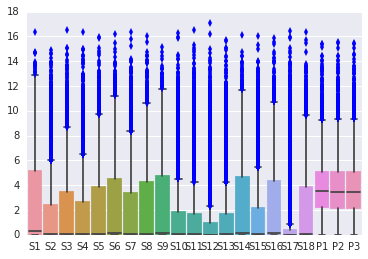

In [33]:
sns.boxplot(expression_filtered_by_all_samples)

# gcf = Get current figure
fig = plt.gcf()
fig.savefig('expression_filtered_by_all_samples_boxplot.pdf')

## Getting only the columns you want

In the next exercise, we'll get just the single cells

For the next step, we're going to pull out just the pooled - which are conveniently labeled as "P#". We'll do this using a [list comprehension](http://www.pythonforbeginners.com/basics/list-comprehensions-in-python), which means we'll create a new list based on the items in `geo_expression.columns` and whether or not they start with the letter `'P'`.

In [34]:
pooled_ids = [x for x in expression_logged.columns if x.startswith('P')]
pooled_ids

['P1', 'P2', 'P3']

We'll access the columns we want using this bracket notation (note that this only works for columns, not rows)

In [35]:
pooled = expression_logged[pooled_ids]
pooled.head()

,P1,P2,P3
GENE,,,
XKR4,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000
B3GAT2,0.748742,0.032801,0.150866
NPL,3.019587,2.949914,3.956563
T2,0.086869,0.000000,0.071221


We could do the same thing using `.loc` but we would need to put a colon "`:`" in the "rows" section (first place) to show that we want "all rows."

In [39]:
expression_logged.loc[:, pooled_ids].head()

,P1,P2,P3
GENE,,,
XKR4,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000
B3GAT2,0.748742,0.032801,0.150866
NPL,3.019587,2.949914,3.956563
T2,0.086869,0.000000,0.071221


### Exercise 6: Make a dataframe of only single samples

Use list comprehensions to make a list called `single_ids` that consists only of single cells, and use that list to subset `expression_logged` and create a dataframe called `singles`. (Hint - how are the single cells ids different from the pooled ids?)

In [41]:
# YOUR CODE HERE
single_ids = [x for x in expression_logged.columns if x.startswith('S')]
singles = expression_logged[single_ids]
print(singles.shape)
singles.head()

(27723, 18)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
GENE,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.033427,0.000000,0.000000,0.041774,0.000000,0.077861,0.000000,0.041871,0.034409,0.000000,0.000000,0.044960,0.000000,0.000000,0.000000,5.431296
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,0.000000,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000
T2,0.149583,0.228984,0.000000,0.000000,0.242088,0.105695,0.109290,0.000000,0.129215,0.106459,0.000000,0.759973,0.014551,0.113616,0.000000,0.000000,0.120192,0.095146


In [42]:
assert singles.shape == (27723, 18)

## Using two different dataframes for filtering

### Exercise 7: Filter the full dataframe using the singles dataframe

Now we'll actually do the filtering done by the paper. Using the `singles` dataframe you just created, get the genes that have expression greater than 1 in at least 3 single cells, and use that to filter `expression_logged`. Call this dataframe `expression_filtered_by_singles`.

In [44]:
# YOUR CODE HERE
expression_filtered_by_singles = expression_logged[(singles>1).sum(axis=1) > 2]
print(expression_filtered_by_singles.shape)
expression_filtered_by_singles.head()

(6312, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,...,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,3.019587,2.949914,3.956563
QK,7.268986,6.035328,5.551280,0.096368,4.769427,0.164792,5.381642,3.967559,0.193883,1.096957,...,0.000000,4.899227,3.310201,0.434425,5.118232,3.153489,0.059040,5.581934,5.324961,5.297343
AK163153,1.802450,2.809825,1.561663,1.615288,1.828564,1.301057,1.490883,1.411808,1.761127,1.493531,...,3.509926,3.034182,1.602128,1.734510,6.415105,1.972540,0.617935,0.872966,0.566249,0.411154
PARK2,0.780057,0.721962,0.871528,0.604061,0.000000,0.867463,0.584193,0.797628,0.495236,1.217808,...,2.325056,1.089339,1.600526,1.165026,0.846808,0.699883,0.131962,1.176145,0.385246,0.931065
AGPAT4,0.137159,8.466538,5.968792,0.095240,0.000000,6.852955,0.100044,5.959222,4.802383,0.000000,...,0.000000,0.000000,6.392022,0.000000,0.000000,6.086903,0.246741,4.117659,3.086869,4.048623


In [45]:
assert expression_filtered_by_singles.shape == (6312, 21)

Let's make a boxplot again to see how the data has changed.

/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


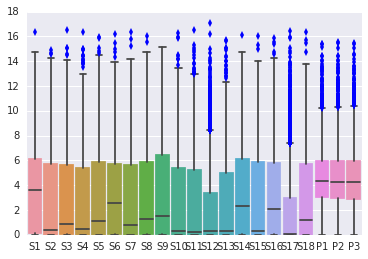

In [46]:
sns.boxplot(expression_filtered_by_singles)

fig = plt.gcf()
fig.savefig('expression_filtered_by_singles_boxplot.pdf')

This is much nicer because now we don't have so many zeros and each sample has a reasonable dynamic range.

## Why did this filtering even matter?

You may be wondering, we did all this work to remove some zeros..... so the FPKM what? Let's take a look at how this affects the relationships between samples using `sns.jointplot` from seaborn, which will plot a correlation scatterplot. This also calculates the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), a linear correlation metric.

Let's first do this on the unlogged data.

/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


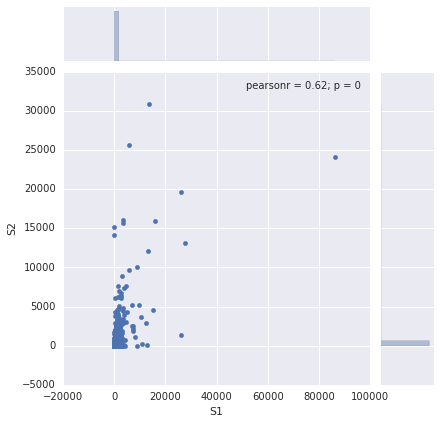

In [47]:
sns.jointplot('S1', 'S2', geo_expression)

Pretty funky looking huh? That's why we logged it :)

Now let's try this on the logged data.

/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


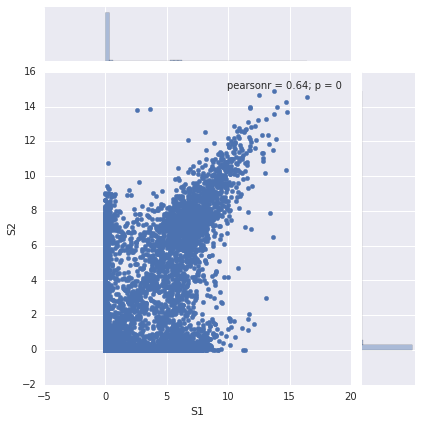

In [48]:
sns.jointplot(expression_logged['S1'], expression_logged['S2'])

Hmm our pearson correlation increased from 0.62 to 0.64. Why could that be?

Let's look at this same plot using the filtered data.

/home/ucsd-train13/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


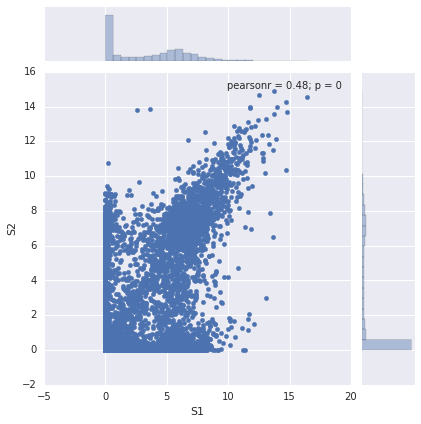

In [49]:
sns.jointplot('S1', 'S2', expression_filtered_by_singles)

And now our correlation went DOWN!? Why would that be? 

### Exercise 8: Discuss changes in correlation

Take 2-5 sentences to explain why the correlation changed between the different datasets.

In [ ]:
# YOUR CODE HERE